Plot FEFF calucation shell by shell


In [5]:
from matplotlib import pyplot as plt
import numpy as np
import glob

Add colour map to show the shell change

In [8]:
from matplotlib import cm


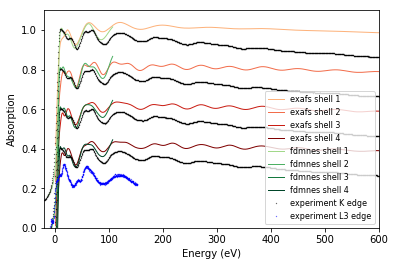

In [37]:
filename = glob.glob('/Users/sophia17_2/ownCloud/PhD/Simulation/CdS/FEFF/feff_shell/exafs*.dat')
filename.sort()
feff_data={}
plt.figure()
cmap_xanes = cm.get_cmap('Purples')
cmap_exafs = cm.get_cmap('OrRd')
cmap_fdmnes = cm.get_cmap('YlGn')

for i,file in enumerate(filename):
    label = file[-11:-4]
    feff_data[label] = np.genfromtxt(file)[:,(1,3)]
    if label[:5]=='xanes':
        cmap = cmap_xanes
    elif label[:5]=='exafs':
        cmap = cmap_exafs
    plt.plot(feff_data[label][:,0]+6,feff_data[label][:,1]-0.2*(int(label[-1])-1),linewidth=1,label='{:s} shell {:s}'.format(label[:5],label[-1]),color=cmap((float(label[-1])*2+2)/10)) 

filename = glob.glob('/Users/sophia17_2/ownCloud/PhD/Simulation/CdS/FEFF/feff_shell/fdmnes*.txt')
filename.sort()

for i,file in enumerate(filename):
    label = file[-5]
    data = np.genfromtxt(file,skip_header=1)
    plt.plot(data[:,0]+7,data[:,1]*30+0.1-0.2*(int(label)-1),linewidth=1,label='fdmnes shell {:s}'.format(label),color=cmap_fdmnes((float(label)*2+2)/10))
    

bulk = np.genfromtxt('/Users/sophia17_2/ownCloud/PhD/Experiment_Analysis/CdS/CdS_XAFS_CdK_mu_2018.xmu')[:,(0,2)]
bulk_L3 = np.genfromtxt('/Users/sophia17_2/ownCloud/PhD/Experiment_Analysis/CdSe/CdSe_CdS_XAFS_CdL3_2018.txt')[:,(0,1)]
for i in range(3):
    plt.plot(bulk[:,0]-26690,bulk[:,1]-0.2*i,'k.',markersize=0.5)
plt.plot(bulk[:,0]-26691,bulk[:,1]-0.2*3,'k.',markersize=0.5,label='experiment K edge')
plt.plot(bulk_L3[:,0]-3557,bulk_L3[:,1]-0.15-0.2*3,'b.',markersize=0.5,label='experiment L3 edge')


plt.legend(loc='lower right',prop={'size': 8})
plt.ylim([0,1.1])
plt.xlim([-20,600])
plt.xlabel('Energy (eV)')
plt.ylabel('Absorption')
plt.savefig('/Users/sophia17_2/ownCloud/PhD/Simulation/CdS/FEFF/feff_shell/feff_shell.pdf',format='pdf')

